In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Deep/dataset/test/
!unzip "validation.zip"

In [5]:
INIT_LR = 1e-4
NUM_EPOCHS = 200
BATCH_SIZE = 64

In [6]:
from tensorflow.keras.applications import ResNet152
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
import os
from tensorflow.keras.preprocessing.image import load_img
import imutils
from google.colab.patches import cv2_imshow

In [7]:
lb = pickle.loads(open('/content/drive/MyDrive/Deep/output/lb.pkl', "rb").read())

In [8]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Deep/output/resnet152_150epoch.h5')

In [16]:
import glob
list_lanhtinh=glob.glob("/content/drive/MyDrive/Deep/dataset/test/lanhtinh/*")
list_actinh=glob.glob("/content/drive/MyDrive/Deep/dataset/test/actinh/*")

In [20]:
y_pre_lanhtinh=[]
for i in list_lanhtinh:
  img = load_img(i, target_size=(224, 224))
  image = img_to_array(img) / 255.0
  image = np.expand_dims(image, axis=0)
  (boxPreds, labelPreds) = model.predict(image)
  (startX, startY, endX, endY) = boxPreds[0]
  i = np.argmax(labelPreds, axis=1)
  label = lb.classes_[i][0]
  y_pre_lanhtinh.append(label)

In [21]:
y_pre_actinh=[]
for i in list_actinh:
  img = load_img(i, target_size=(224, 224))
  image = img_to_array(img) / 255.0
  image = np.expand_dims(image, axis=0)
  (boxPreds, labelPreds) = model.predict(image)
  (startX, startY, endX, endY) = boxPreds[0]
  i = np.argmax(labelPreds, axis=1)
  label = lb.classes_[i][0]
  y_pre_actinh.append(label)

In [25]:
y_test_lanhtinh=["lanhtinh"]*len(list_lanhtinh)
y_test_actinh=["actinh"]*len(list_actinh)

In [28]:
y_pre=y_pre_lanhtinh+y_pre_actinh

In [30]:
y_test=y_test_lanhtinh+y_test_actinh

In [32]:
from sklearn.metrics import recall_score,precision_score
recall_score(y_test, y_pre, average='macro')

0.5802037965321719

In [33]:
precision_score(y_test, y_pre, average='macro')

0.5917969955529951

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print("Accuracy: %.1f %%" %(100*accuracy_score(y_test, y_pre)))

Accuracy: 59.7 %


In [36]:
def plot_confusion_matrix(matrix, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.imshow(matrix, cmap = plt.cm.Blues)
    tick_marks = np.arange(len(matrix))
    plt.xticks(tick_marks, rotation=45)
    plt.yticks(tick_marks)
    plt.ylabel('True label')
    plt.xlabel('Predict')
    plt.colorbar()
    for (i, j), z in np.ndenumerate(matrix):
      plt.text(i, j, z, ha='center', va='center')

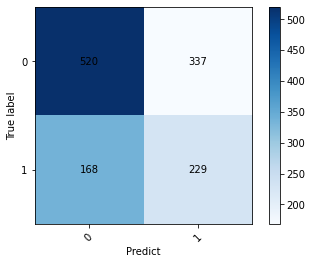

In [38]:
cm=confusion_matrix(y_test,y_pre)
plot_confusion_matrix(cm)